# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://...../datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [7]:
data.isna().sum() # проверка заполнения

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

In [9]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [10]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

54

In [18]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [19]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [20]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [23]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [24]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [25]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [26]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [27]:
def part_debt(index,name_column):
    data_pivot_table = (data.pivot_table(index=index, values = 'debt', aggfunc = ['count','sum','mean'])).reset_index()
    data_pivot_table.columns = [name_column,'Всего кредитополучателей', 'Всего должников', 'Доля дожников']
    return data_pivot_table

data_grouped_children = part_debt('children', 'Кол-во детей')
data_grouped_children

,Кол-во детей,Всего кредитополучателей,Всего должников,Доля дожников
0,0,14107,1063,0.075353
1,1,4809,444,0.092327
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


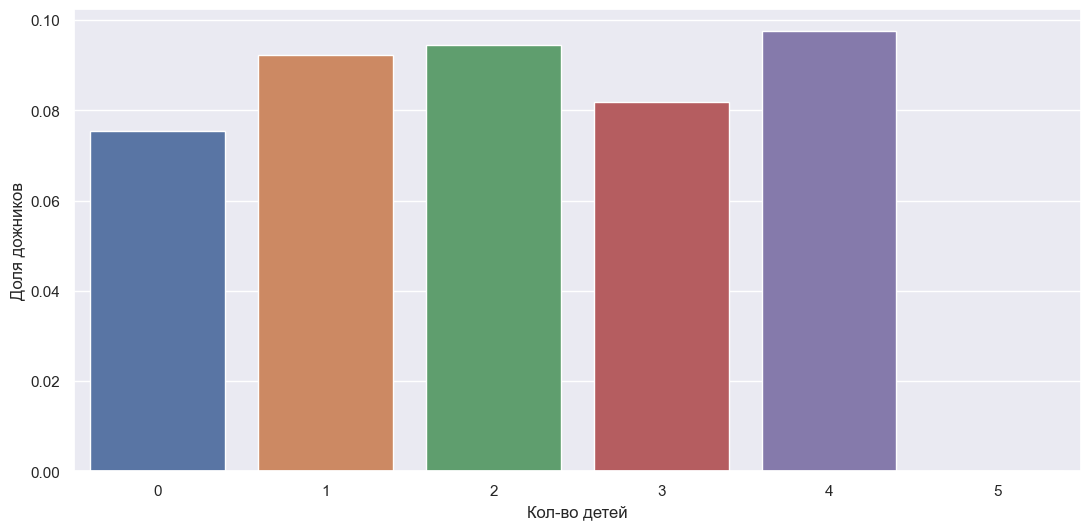

In [28]:
seaborn.set(rc={'figure.figsize':(13,6)})
seaborn.barplot(x=data_grouped_children['Кол-во детей'] , y=data_grouped_children['Доля дожников']); 
#разобралась как задать ось х по столбцу. До этого была проблема из-за несброшенных индексов
#импорт библиотеки seaborn перенесла в начало

**Вывод:** Выборка семей с пятью детьми слишком мала, чтобы делать по ней выводы. Исходя из остальных данных, показатели лучше всего у людей без детей (примерно на 1,5-2%). Количество детей влияет незначительно на выплату кредитов. 

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Вывод верный!
</div>

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [29]:
data_grouped_family = part_debt('family_status', 'Семейное положение')
data_grouped_family

,Семейное положение,Всего кредитополучателей,Всего должников,Доля дожников
0,Не женат / не замужем,2796,273,0.097639
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246
3,гражданский брак,4146,385,0.092861
4,женат / замужем,12266,927,0.075575


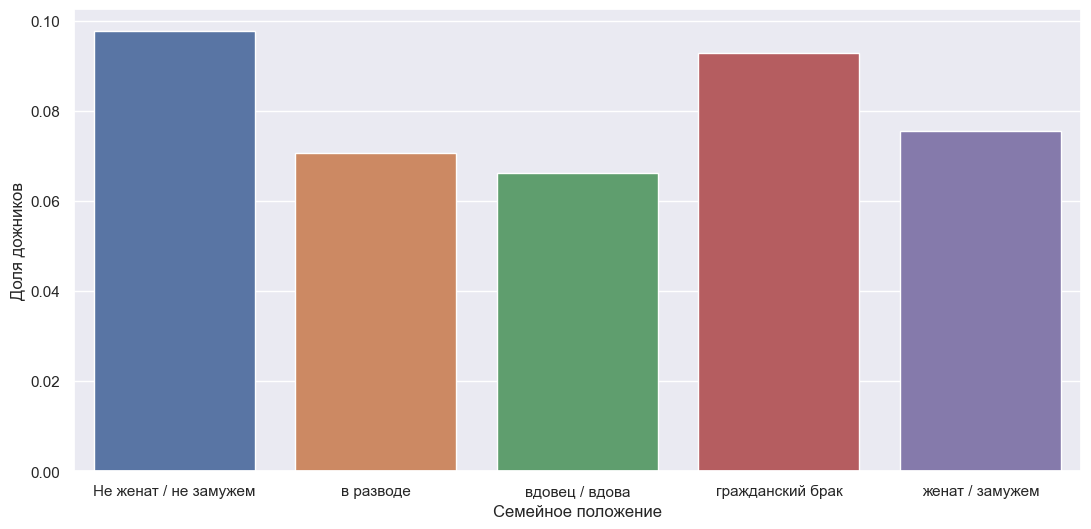

In [30]:
seaborn.barplot(x=data_grouped_family['Семейное положение'], y=data_grouped_family['Доля дожников']);

**Вывод:** Меньше всего должников в категориях "вдовец/вдова" - 6,6% и "в разводе" - 7%, больше всего в категориях "Не женат" - 9,8% и "гражданский брак" - 9,3%. Но разница составляет всего около 2%.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [31]:
data_grouped_income = part_debt('total_income_category', 'Категория дохода')
data_grouped_income
# Ваш код будет здесь. Вы можете создавать новые ячейки.

,Категория дохода,Всего кредитополучателей,Всего должников,Доля дожников
0,A,25,2,0.080000
1,B,5014,354,0.070602
2,C,15938,1353,0.084891
3,D,349,21,0.060172
4,E,22,2,0.090909


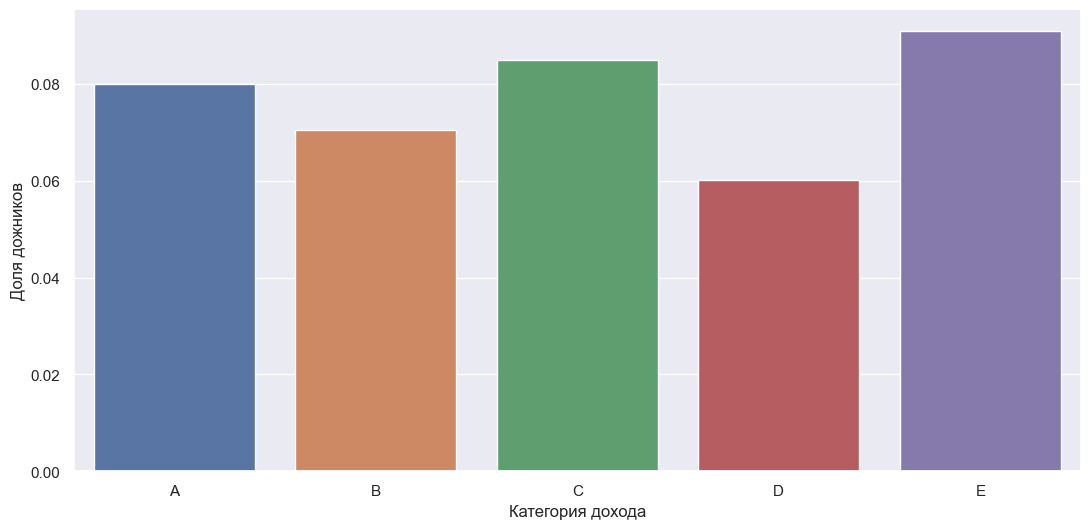

In [32]:
seaborn.barplot(x=(data_grouped_income['Категория дохода']) , y=(data_grouped_income['Доля дожников']));

**Вывод:** Меньше всего должников в категории D (доход от 30 000 до 50 000) около 6%. Больше всего -  категории E (до 30 000)- 9%. Но так же, как и в предыдущих исследованиях разница между категориями всего около 1,5-3%

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [33]:
data_grouped_purpose = part_debt('purpose_category', 'Цель кредита')
data_grouped_purpose
# Ваш код будет здесь. Вы можете создавать новые ячейки.

,Цель кредита,Всего кредитополучателей,Всего должников,Доля дожников
0,операции с автомобилем,4281,400,0.093436
1,операции с недвижимостью,10754,780,0.072531
2,получение образования,3989,369,0.092504
3,проведение свадьбы,2324,183,0.078744


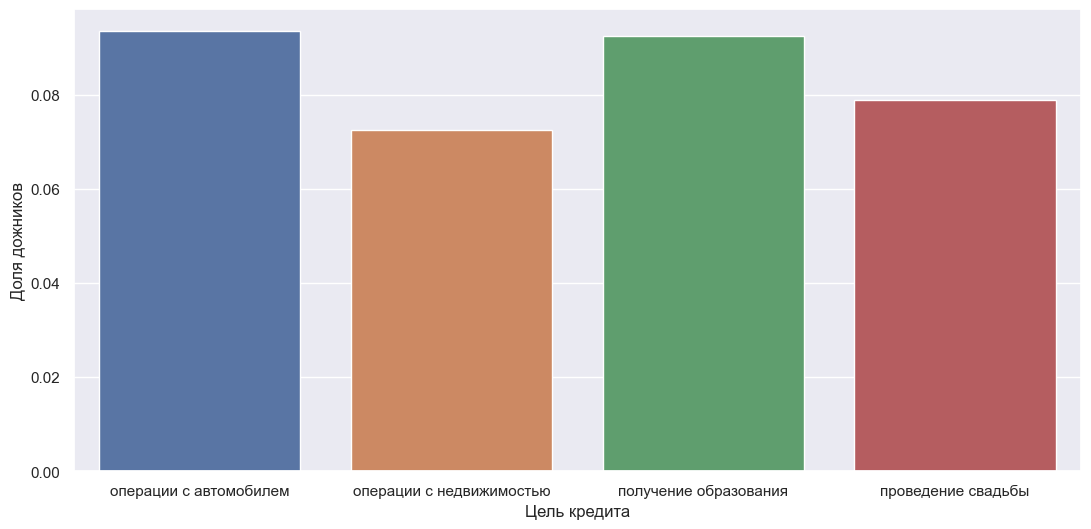

In [34]:
seaborn.barplot(x=(data_grouped_purpose['Цель кредита']), y=(data_grouped_purpose['Доля дожников']));
#Та же проблема с наезжающим текстом

**Вывод:** Меньше всего должников среди тех, кто брал кредит на недвижимость - около 7%. Больше всего - среди тех, кто брал на образование и автомобиль - около 9%. Так же, как и в предыдущих исследованиях разница между категориями всего около 2%

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* 
В данных были обнаружены пропуски в двух колонках: days_employed - трудовой стаж и total_income - ежемесячный доход. 
    
    Пропуск в колонке с ежемесячным доходом может быть по двум причинам: 
* официально подтвержденного дохода нет,
* человек не сообщил банку о своих доходах по каким-либо причинам
   
   Пропуски в трудовом стаже могут быть обусловлены отсутствием официального тружового стажа.
   
   Так же проблемы с данными могли возникунуть на этапе выгрузки (об этом так же свидетельствует отрицательные велицины в трудовом стаже, которых в реальности быть не может)


**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* 
- Процент пропусков составляет около 10%, избавиться от данных будет не лучшим решением, т.к. это достаточно сильно сократит выборку. 
- Заполнение по среднему значению приведет к искажению. В выборке могут встречатся сильно отклоняющиеся от среднего значения, которые будут смещать среднее в большую или меньшую сторону.

Таким образом заполение по медиане приведет к наименьшим искажениям. Для более точного результата, заполняем не просто медианой по всем данным, а в зависимости от другой категории. Например: медианный ежемесячный доход  - в зависимости от типа деятельности, который обычно сильнее всего и влияет на доход.

### **Дополнительные исследования**

**1.** Посмотрим зависимость выплаты кредита в зависимости от пола

In [35]:
data_grouped_sex = part_debt('gender', 'Пол')
data_grouped_sex

,Пол,Всего кредитополучателей,Всего должников,Доля дожников
0,F,14107,989,0.070107
1,M,7240,743,0.102624
2,XNA,1,0,0.000000


Есть аномальное непонятное значение XNA, удалим строку	

In [36]:
data_grouped_sex = data_grouped_sex[data_grouped_sex['Пол'] != "XNA"]
data_grouped_sex

,Пол,Всего кредитополучателей,Всего должников,Доля дожников
0,F,14107,989,0.070107
1,M,7240,743,0.102624


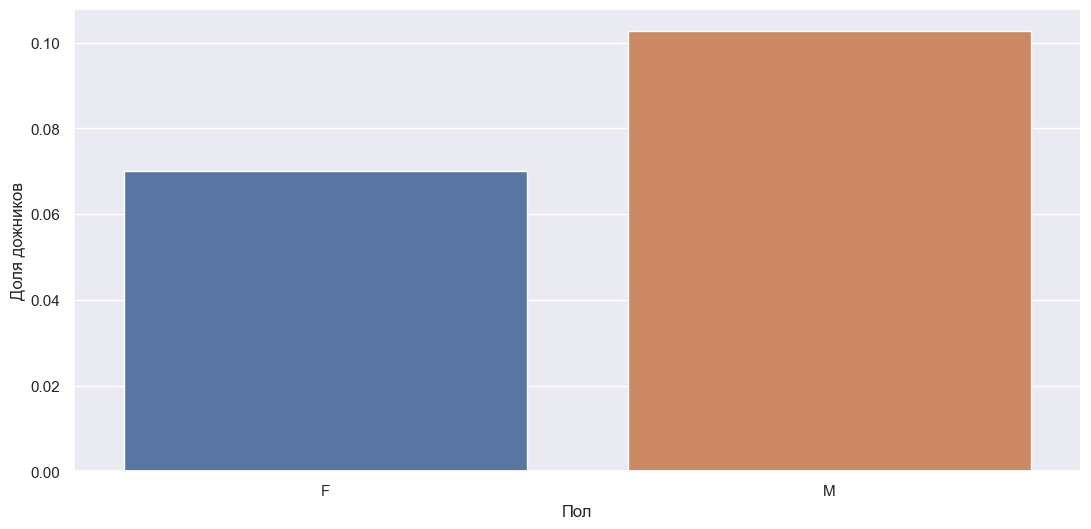

In [37]:
seaborn.barplot(x=(data_grouped_sex['Пол']), y=(data_grouped_sex['Доля дожников']));

**Выаод** Женщины чаще выплачивают кредит, чем мужчины. Разница составляет примерно 3,2%. 

**2.** Попробуем найти лучших клиентов для банка, выдающего кредит

In [38]:
# функция для поиска кандидата, входящего во все 4 группы с лучшим показателям по выплате
def perfect_credit(row): 
    if (row['children'] == 0) & (row['family_status'] == 'вдовец / вдова')  & (row['total_income_category'] == 'D') & (row['purpose_category'] == 'операции с недвижимостью') & (row['gender'] == 'F'):
        return 'хороший кандидат'
    else:
        return 'нужна проверка'
data['perfect_candidat'] = data.apply(perfect_credit, axis=1)
data.loc[data['perfect_candidat'] == 'хороший кандидат'] # фильтр нужных строк


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,perfect_candidat
1919,0,3031.208341,44,среднее,1,вдовец / вдова,2,F,сотрудник,0,48925,строительство собственной недвижимости,D,операции с недвижимостью,хороший кандидат
3574,0,343627.912639,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,46279,жилье,D,операции с недвижимостью,хороший кандидат
4583,0,341443.389498,63,среднее,1,вдовец / вдова,2,F,пенсионер,0,46473,жилье,D,операции с недвижимостью,хороший кандидат
4727,0,334348.871543,61,среднее,1,вдовец / вдова,2,F,пенсионер,0,47823,операции с жильем,D,операции с недвижимостью,хороший кандидат
4963,0,360639.907161,72,начальное,3,вдовец / вдова,2,F,пенсионер,0,34024,операции со своей недвижимостью,D,операции с недвижимостью,хороший кандидат
10944,0,361943.358117,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,39383,ремонт жилью,D,операции с недвижимостью,хороший кандидат
11049,0,355035.101774,51,среднее,1,вдовец / вдова,2,F,пенсионер,0,42091,покупка коммерческой недвижимости,D,операции с недвижимостью,хороший кандидат
11157,0,329416.874245,71,среднее,1,вдовец / вдова,2,F,пенсионер,0,39406,покупка жилой недвижимости,D,операции с недвижимостью,хороший кандидат
12417,0,388408.975161,64,высшее,0,вдовец / вдова,2,F,пенсионер,0,42319,покупка жилой недвижимости,D,операции с недвижимостью,хороший кандидат
14202,0,349012.164686,54,среднее,1,вдовец / вдова,2,F,пенсионер,0,47378,строительство недвижимости,D,операции с недвижимостью,хороший кандидат


In [39]:
data.loc[data['perfect_candidat'] == 'хороший кандидат']['gender'].count() #считаем кол-во строк (кол-во идеальных кандидатов)

11

В нашей выборке всего 11 человек входит сразу во все категории с лучшей статистикой по выплате кредита

**3.** Попробуем найти самых рискованных клиентов для банка

In [40]:
def perfect_credit(row): 
    if ((row['children'] == 4)|(row['children'] == 4)) & (row['family_status'] == 'Не женат / не замужем')  & (row['total_income_category'] == 'D') & (row['purpose_category'] == 'операции с автомобилем') & (row['gender'] == 'M'):
        return 'ненадежный кандидат'
    else:
        return 'нужна проверка'

data['risky_candidat'] = data.apply(perfect_credit, axis=1)
data.loc[data['risky_candidat'] == 'ненадежный кандидат'] # фильтр нужных строк

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,perfect_candidat,risky_candidat


В нашей выбоке людей, подходящих во все категории с худшей статистикой по выплатам нет

## Общий вывод.

Все из исследованных факторов (наличие детей, семейное положение, уровень дохода, цель кредита) в малой степени влияют на выплату кредита. В каждом исследовании разница между группами составляет не более 3% (в среднем 1,5%). Однако женщины чаще мужчин возвращают заемные средства.

При выдаче кредита лучше учитывать сразу несколько факторов в совокупности. 
Наиболее благонадежным клиентом по результатам исследования считается человек:
* Женщина-вдова без детей с доходом 30 000 – 50 000 с целью кредита на недвижимость.
Из нашей выборки в 21525 человек только 11 входят сразу в 4 категории с лучшей статистикой по возрату задолжности.

Самым рискованным будет:
* Не женатый мужчина, имеющий 2х или 4х детей, с доходом до 30 000 и целью кредита на автомобиль. 
Таких в нашей выборке нет. Относительно реальной жизни действительно такие люди будут встречаться очень редко